# Heart Disease Classification - Toby Liang

## Importing Essential Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data and Data Summary

In [2]:
dataset = pd.read_csv("./data/heart_disease.csv")

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Fields Explained
- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol**: The person's cholesterol measurement in mg/dl
- **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach**: The person's maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
- **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca**: The number of major vessels (0-3)
- **thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target**: Heart disease (0 = no, 1 = yes)

In [4]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data contains 303 examples with 13 features and 1 binary label

In [5]:
dataset.shape

(303, 14)

In [6]:
dataset.target.unique()

array([1, 0])

In [7]:
# One Hot Encoding
dataset = pd.get_dummies(dataset, columns=["sex", "cp", "restecg", "exang", "slope", "thal"])

In [8]:
dataset.corr()["target"]

age         -0.225439
trestbps    -0.144931
chol        -0.085239
fbs         -0.028046
thalach      0.421741
oldpeak     -0.430696
ca          -0.391724
target       1.000000
sex_0        0.280937
sex_1       -0.280937
cp_0        -0.516015
cp_1         0.245879
cp_2         0.316742
cp_3         0.086957
restecg_0   -0.159775
restecg_1    0.175322
restecg_2   -0.068410
exang_0      0.436757
exang_1     -0.436757
slope_0     -0.063554
slope_1     -0.362053
slope_2      0.394066
thal_0      -0.007293
thal_1      -0.106589
thal_2       0.527334
thal_3      -0.486112
Name: target, dtype: float64

## Data Visualization

### Target

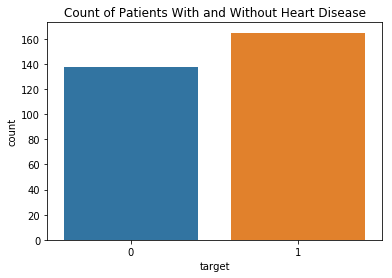

In [7]:
plt.title("Count of Patients With and Without Heart Disease")
sns.countplot(dataset.target)
plt.show()

In [8]:
dataset.target.describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

*Slightly more subjects (54.46%) have heart disease than not.*

### Sex

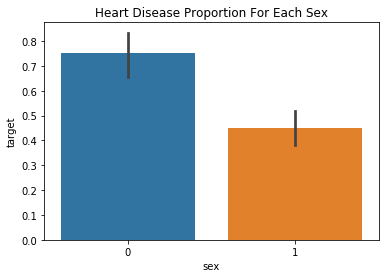

In [22]:
plt.title("Heart Disease Proportion For Each Sex")
sns.barplot(dataset.sex, dataset.target)
plt.show()

*Heart disease occurs significanly more frequently in female subjects than male subjects.*

### Chest Pain

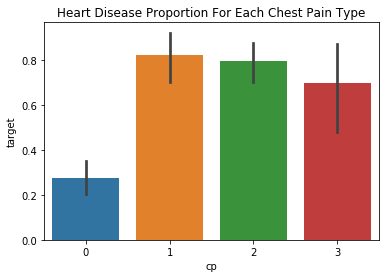

In [10]:
plt.title("Heart Disease Proportion For Each Chest Pain Type")
sns.barplot(dataset.cp, dataset.target)
plt.show()

*Heart disease occurs significantly less in patients with typical angina while proportions for patients with other chest pains are quite high (70%-80%).*

### Fasting Blood Sugar

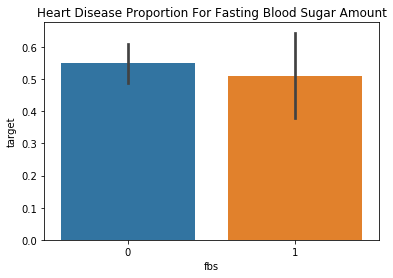

In [11]:
plt.title("Heart Disease Proportion For Fasting Blood Sugar Amount")
sns.barplot(dataset.fbs, dataset.target)
plt.show()

*Subjects with resting blood sugar of less than 120 mg/dl are slightly more likely to have heart disease.*

### Resting ECG

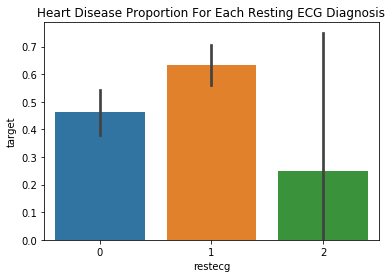

In [12]:
plt.title("Heart Disease Proportion For Each Resting ECG Diagnosis")
sns.barplot(dataset.restecg, dataset.target)
plt.show()

*Subjects with ST-T wave abnormality are more likely to have heart disease.*

### Exercise Induced Angina

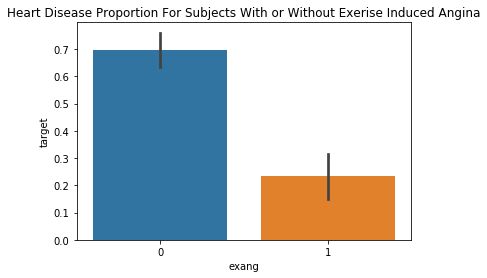

In [13]:
plt.title("Heart Disease Proportion For Subjects With or Without Exerise Induced Angina")
sns.barplot(dataset.exang, dataset.target)
plt.show()

*Subjects without exercise induced angina are significanly more likely to have heart disease.*

### Slope of the Peak Exercise ST Segment

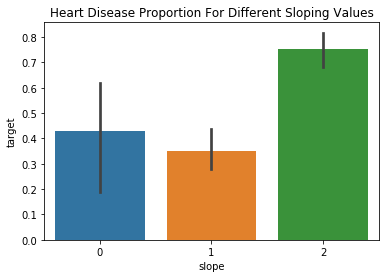

In [14]:
plt.title("Heart Disease Proportion For Different Sloping Values")
sns.barplot(dataset.slope, dataset.target)
plt.show()

*Subjects with a flat slope have a significantly higher change of heart disease.*

### Number of Major Blood Vessels

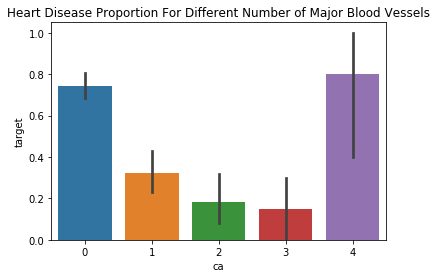

In [15]:
plt.title("Heart Disease Proportion For Different Number of Major Blood Vessels")
sns.barplot(dataset.ca, dataset.target)
plt.show()

### Thalassemia

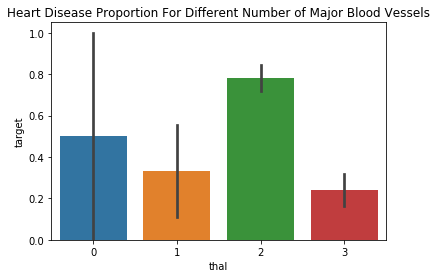

In [16]:
plt.title("Heart Disease Proportion For Different Number of Major Blood Vessels")
sns.barplot(dataset.thal, dataset.target)
plt.show()

## Data Preprocessing

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# dataset = pd.read_csv("./data/heart_disease.csv")
features = dataset.drop("target", axis = 1)
labels = dataset.target

# Get training and testing data
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, train_size = 0.8)

In [10]:
print("Train Data Shape: " + str(train_data.shape))
print("Train Label Count: " + str(len(train_labels)) + "\n")
print("Test Data Shape: " + str(test_data.shape))
print("Test Label Count: " + str(len(test_labels)) + "\n")

Train Data Shape: (242, 25)
Train Label Count: 242

Test Data Shape: (61, 25)
Test Label Count: 61



## Support Vector Machine

In [11]:
from sklearn import svm
def build_svm():
    model = svm.SVC()
    model.fit(train_data, train_labels)
    print("Accuracy: " + str(model.score(test_data, test_labels)))

In [12]:
build_svm()

Accuracy: 0.5245901639344263


## Deep Model Definition

In [13]:
# Keras modules
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adamax
from keras.initializers import RandomUniform

# # Mute depreciation warnings
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

# Hyperparameter tuning modules
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [14]:
def build_model(lr=0.001, decay=0.0, initializer_val=0.05, num_layers=1, num_nodes=16, dp=0.0):
    # Defining model
    model = Sequential()
    
    # Defining kernel_initializer
    initializer = RandomUniform(minval=-initializer_val, maxval=initializer_val)
    
    # Adding layers
    model.add(Dense(num_nodes, kernel_initializer=initializer, activation="relu", input_dim=train_data.shape[1]))
    model.add(Dropout(dp))
    model.add(Dense(num_nodes, kernel_initializer=initializer, activation="relu"))
    model.add(Dropout(dp))
    
    model.add(Dense(1, kernel_initializer=initializer, activation="sigmoid"))
    
    # Defining optimizer
    opt = Adamax(lr=lr, decay=decay)
    
    # Compiling model
    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    
    return model

## Model Tuning

In [43]:
# Keras Classifier for model tuning
model = KerasClassifier(build_fn=build_model, verbose=0, epochs=20)

# Grid search tuning
def tune_by_grid(model, param_grid, cv=5):
    grid = GridSearchCV(estimator=model, scoring="accuracy", param_grid=param_grid, verbose=1, cv=cv)
    grid_result = grid.fit(train_data, train_labels)
    print("Tuning finished.")

    return grid_result

# Grid analysis
def get_grid_analysis(grid_result):
    # Print best result
    print("Best: " + str(round(grid_result.best_score_, 3)) + " using " + str(grid_result.best_params_))
    
    # Get means, stds, and params
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    # Print means, stds, and params
    for mean, stdev, param in zip(means, stds, params):
        print(str(round(mean, 3)) + " with: " + str(param) + " stdev: " + str(round(stdev, 3)) + "")

### Learning Rate and Dropout Optimization

In [44]:
def optimize_lr_dp():
    grid = dict(lr = [0.003, 0.002, 0.001], dp = [0.0, 0.1, 0.2, 0.3])
    cv = 5
    grid_result = tune_by_grid(model, grid, cv)
    get_grid_analysis(grid_result)
    
optimize_lr_dp()

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  5.6min finished
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuning finished.
Best: 0.645 using {'dp': 0.0, 'lr': 0.003}
0.645 with: {'dp': 0.0, 'lr': 0.003} stdev: 0.108
0.574 with: {'dp': 0.0, 'lr': 0.002} stdev: 0.111
0.566 with: {'dp': 0.0, 'lr': 0.001} stdev: 0.11
0.62 with: {'dp': 0.1, 'lr': 0.003} stdev: 0.117
0.562 with: {'dp': 0.1, 'lr': 0.002} stdev: 0.101
0.562 with: {'dp': 0.1, 'lr': 0.001} stdev: 0.104
0.579 with: {'dp': 0.2, 'lr': 0.003} stdev: 0.112
0.574 with: {'dp': 0.2, 'lr': 0.002} stdev: 0.121
0.554 with: {'dp': 0.2, 'lr': 0.001} stdev: 0.095
0.595 with: {'dp': 0.3, 'lr': 0.003} stdev: 0.129
0.55 with: {'dp': 0.3, 'lr': 0.002} stdev: 0.091
0.554 with: {'dp': 0.3, 'lr': 0.001} stdev: 0.095


### Epoch Optimization

In [19]:
def optimize_epoch():
    grid = dict(epochs = [250, 300, 350, 400])
    cv = 5
    grid_result = tune_by_grid(model, grid, cv)
    get_grid_analysis(grid_result)
    
optimize_epoch()

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.8min finished
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuning finished.
Best: 0.822 using {'epochs': 350}
0.802 with: {'epochs': 250} stdev: 0.054
0.814 with: {'epochs': 300} stdev: 0.035
0.822 with: {'epochs': 350} stdev: 0.051
0.818 with: {'epochs': 400} stdev: 0.028


### Kernel Initializer RandomUniform Range Optimization

In [11]:
initializer_grid = dict(initializer_val = [0.04, 0.03, 0.02, 0.01])
grid_result = tune_by_grid(model, initializer_grid, 5)
get_grid_analysis(grid_result)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  5.1min finished
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuning finished.
Best: 0.826 using {'initializer_val': 0.04}
0.826 with: {'initializer_val': 0.04} stdev: 0.058
0.818 with: {'initializer_val': 0.03} stdev: 0.068
0.822 with: {'initializer_val': 0.02} stdev: 0.05
0.818 with: {'initializer_val': 0.01} stdev: 0.065


## Model Fitting

In [93]:
model = build_model(lr=0.0005, decay=0, initializer_val = 0.03, dp=0.005)
def fit_model(epochs=700):
    return model.fit(train_data, train_labels, epochs=epochs, batch_size=train_data.shape[0] // 2, validation_split=0.2, verbose=1)
history = fit_model()
print("Accuracy: " + str(history.history["acc"][-1]))

Train on 193 samples, validate on 49 samples
Epoch 1/700
193/193 [==============================] - 6s 33ms/step - loss: 0.6930 - acc: 0.5337 - val_loss: 0.6912 - val_acc: 0.6327
Epoch 2/700
193/193 [==============================] - 0s 80us/step - loss: 0.6928 - acc: 0.5337 - val_loss: 0.6909 - val_acc: 0.6327
Epoch 3/700
193/193 [==============================] - 0s 95us/step - loss: 0.6926 - acc: 0.5337 - val_loss: 0.6907 - val_acc: 0.6327
Epoch 4/700
193/193 [==============================] - 0s 93us/step - loss: 0.6927 - acc: 0.5337 - val_loss: 0.6904 - val_acc: 0.6327
Epoch 5/700
193/193 [==============================] - 0s 83us/step - loss: 0.6925 - acc: 0.5337 - val_loss: 0.6901 - val_acc: 0.6327
Epoch 6/700
193/193 [==============================] - 0s 84us/step - loss: 0.6923 - acc: 0.5337 - val_loss: 0.6899 - val_acc: 0.6327
Epoch 7/700
193/193 [==============================] - 0s 82us/step - loss: 0.6924 - acc: 0.5337 - val_loss: 0.6897 - val_acc: 0.6327
Epoch 8/700
193/1

193/193 [==============================] - 0s 71us/step - loss: 0.6828 - acc: 0.5337 - val_loss: 0.6667 - val_acc: 0.6327
Epoch 62/700
193/193 [==============================] - 0s 67us/step - loss: 0.6824 - acc: 0.5337 - val_loss: 0.6664 - val_acc: 0.6327
Epoch 63/700
193/193 [==============================] - 0s 67us/step - loss: 0.6820 - acc: 0.5337 - val_loss: 0.6658 - val_acc: 0.6327
Epoch 64/700
193/193 [==============================] - 0s 70us/step - loss: 0.6816 - acc: 0.5337 - val_loss: 0.6652 - val_acc: 0.6327
Epoch 65/700
193/193 [==============================] - 0s 69us/step - loss: 0.6817 - acc: 0.5337 - val_loss: 0.6645 - val_acc: 0.6327
Epoch 66/700
193/193 [==============================] - 0s 67us/step - loss: 0.6814 - acc: 0.5337 - val_loss: 0.6639 - val_acc: 0.6327
Epoch 67/700
193/193 [==============================] - 0s 65us/step - loss: 0.6815 - acc: 0.5337 - val_loss: 0.6634 - val_acc: 0.6327
Epoch 68/700
193/193 [==============================] - 0s 68us/step

193/193 [==============================] - 0s 62us/step - loss: 0.6427 - acc: 0.6580 - val_loss: 0.6176 - val_acc: 0.7347
Epoch 122/700
193/193 [==============================] - 0s 67us/step - loss: 0.6414 - acc: 0.6528 - val_loss: 0.6160 - val_acc: 0.7347
Epoch 123/700
193/193 [==============================] - 0s 63us/step - loss: 0.6430 - acc: 0.6528 - val_loss: 0.6143 - val_acc: 0.7347
Epoch 124/700
193/193 [==============================] - 0s 70us/step - loss: 0.6402 - acc: 0.6425 - val_loss: 0.6128 - val_acc: 0.7347
Epoch 125/700
193/193 [==============================] - 0s 72us/step - loss: 0.6400 - acc: 0.6321 - val_loss: 0.6112 - val_acc: 0.7347
Epoch 126/700
193/193 [==============================] - 0s 71us/step - loss: 0.6386 - acc: 0.6477 - val_loss: 0.6096 - val_acc: 0.7347
Epoch 127/700
193/193 [==============================] - 0s 63us/step - loss: 0.6378 - acc: 0.6373 - val_loss: 0.6084 - val_acc: 0.7347
Epoch 128/700
193/193 [==============================] - 0s 63

193/193 [==============================] - 0s 68us/step - loss: 0.5926 - acc: 0.7306 - val_loss: 0.5589 - val_acc: 0.7347
Epoch 182/700
193/193 [==============================] - 0s 67us/step - loss: 0.5919 - acc: 0.7358 - val_loss: 0.5570 - val_acc: 0.7551
Epoch 183/700
193/193 [==============================] - 0s 71us/step - loss: 0.5901 - acc: 0.7254 - val_loss: 0.5558 - val_acc: 0.7551
Epoch 184/700
193/193 [==============================] - 0s 75us/step - loss: 0.5893 - acc: 0.7254 - val_loss: 0.5547 - val_acc: 0.7551
Epoch 185/700
193/193 [==============================] - 0s 73us/step - loss: 0.5858 - acc: 0.7358 - val_loss: 0.5539 - val_acc: 0.7551
Epoch 186/700
193/193 [==============================] - 0s 71us/step - loss: 0.5866 - acc: 0.7358 - val_loss: 0.5531 - val_acc: 0.7551
Epoch 187/700
193/193 [==============================] - 0s 71us/step - loss: 0.5883 - acc: 0.7358 - val_loss: 0.5525 - val_acc: 0.7551
Epoch 188/700
193/193 [==============================] - 0s 70

193/193 [==============================] - 0s 70us/step - loss: 0.5365 - acc: 0.7513 - val_loss: 0.5163 - val_acc: 0.7143
Epoch 242/700
193/193 [==============================] - 0s 65us/step - loss: 0.5350 - acc: 0.7617 - val_loss: 0.5158 - val_acc: 0.7143
Epoch 243/700
193/193 [==============================] - 0s 64us/step - loss: 0.5345 - acc: 0.7720 - val_loss: 0.5143 - val_acc: 0.7143
Epoch 244/700
193/193 [==============================] - 0s 72us/step - loss: 0.5349 - acc: 0.7720 - val_loss: 0.5125 - val_acc: 0.7143
Epoch 245/700
193/193 [==============================] - 0s 67us/step - loss: 0.5356 - acc: 0.7565 - val_loss: 0.5112 - val_acc: 0.7143
Epoch 246/700
193/193 [==============================] - 0s 68us/step - loss: 0.5321 - acc: 0.7668 - val_loss: 0.5103 - val_acc: 0.7143
Epoch 247/700
193/193 [==============================] - 0s 63us/step - loss: 0.5304 - acc: 0.7565 - val_loss: 0.5099 - val_acc: 0.7143
Epoch 248/700
193/193 [==============================] - 0s 70

193/193 [==============================] - 0s 63us/step - loss: 0.4919 - acc: 0.7772 - val_loss: 0.4810 - val_acc: 0.7347
Epoch 302/700
193/193 [==============================] - 0s 64us/step - loss: 0.4992 - acc: 0.7824 - val_loss: 0.4811 - val_acc: 0.7347
Epoch 303/700
193/193 [==============================] - 0s 70us/step - loss: 0.4927 - acc: 0.7927 - val_loss: 0.4808 - val_acc: 0.7347
Epoch 304/700
193/193 [==============================] - 0s 64us/step - loss: 0.4928 - acc: 0.7824 - val_loss: 0.4800 - val_acc: 0.7347
Epoch 305/700
193/193 [==============================] - 0s 66us/step - loss: 0.4965 - acc: 0.7876 - val_loss: 0.4788 - val_acc: 0.7347
Epoch 306/700
193/193 [==============================] - 0s 70us/step - loss: 0.4950 - acc: 0.7876 - val_loss: 0.4777 - val_acc: 0.7347
Epoch 307/700
193/193 [==============================] - 0s 73us/step - loss: 0.4953 - acc: 0.7876 - val_loss: 0.4770 - val_acc: 0.7347
Epoch 308/700
193/193 [==============================] - 0s 68

193/193 [==============================] - 0s 66us/step - loss: 0.4699 - acc: 0.7979 - val_loss: 0.4651 - val_acc: 0.7347
Epoch 362/700
193/193 [==============================] - 0s 63us/step - loss: 0.4650 - acc: 0.7979 - val_loss: 0.4663 - val_acc: 0.7347
Epoch 363/700
193/193 [==============================] - 0s 66us/step - loss: 0.4682 - acc: 0.7979 - val_loss: 0.4667 - val_acc: 0.7347
Epoch 364/700
193/193 [==============================] - 0s 70us/step - loss: 0.4697 - acc: 0.7979 - val_loss: 0.4663 - val_acc: 0.7347
Epoch 365/700
193/193 [==============================] - 0s 67us/step - loss: 0.4649 - acc: 0.7876 - val_loss: 0.4649 - val_acc: 0.7347
Epoch 366/700
193/193 [==============================] - 0s 69us/step - loss: 0.4630 - acc: 0.7927 - val_loss: 0.4633 - val_acc: 0.7347
Epoch 367/700
193/193 [==============================] - 0s 83us/step - loss: 0.4601 - acc: 0.8083 - val_loss: 0.4605 - val_acc: 0.7347
Epoch 368/700
193/193 [==============================] - 0s 69

193/193 [==============================] - 0s 65us/step - loss: 0.4565 - acc: 0.8031 - val_loss: 0.4459 - val_acc: 0.7755
Epoch 422/700
193/193 [==============================] - 0s 62us/step - loss: 0.4520 - acc: 0.7927 - val_loss: 0.4455 - val_acc: 0.7755
Epoch 423/700
193/193 [==============================] - 0s 68us/step - loss: 0.4571 - acc: 0.8187 - val_loss: 0.4460 - val_acc: 0.7755
Epoch 424/700
193/193 [==============================] - 0s 64us/step - loss: 0.4481 - acc: 0.8187 - val_loss: 0.4461 - val_acc: 0.7755
Epoch 425/700
193/193 [==============================] - 0s 73us/step - loss: 0.4508 - acc: 0.8083 - val_loss: 0.4473 - val_acc: 0.7755
Epoch 426/700
193/193 [==============================] - 0s 70us/step - loss: 0.4349 - acc: 0.8135 - val_loss: 0.4477 - val_acc: 0.7755
Epoch 427/700
193/193 [==============================] - 0s 68us/step - loss: 0.4460 - acc: 0.8083 - val_loss: 0.4472 - val_acc: 0.7755
Epoch 428/700
193/193 [==============================] - 0s 67

193/193 [==============================] - 0s 64us/step - loss: 0.4300 - acc: 0.8083 - val_loss: 0.4356 - val_acc: 0.7959
Epoch 482/700
193/193 [==============================] - 0s 64us/step - loss: 0.4131 - acc: 0.8290 - val_loss: 0.4341 - val_acc: 0.7959
Epoch 483/700
193/193 [==============================] - 0s 61us/step - loss: 0.4183 - acc: 0.8342 - val_loss: 0.4327 - val_acc: 0.7959
Epoch 484/700
193/193 [==============================] - 0s 70us/step - loss: 0.4230 - acc: 0.8187 - val_loss: 0.4320 - val_acc: 0.7959
Epoch 485/700
193/193 [==============================] - 0s 66us/step - loss: 0.4303 - acc: 0.8187 - val_loss: 0.4331 - val_acc: 0.7755
Epoch 486/700
193/193 [==============================] - 0s 69us/step - loss: 0.4193 - acc: 0.8394 - val_loss: 0.4334 - val_acc: 0.7959
Epoch 487/700
193/193 [==============================] - 0s 73us/step - loss: 0.4198 - acc: 0.8187 - val_loss: 0.4341 - val_acc: 0.7959
Epoch 488/700
193/193 [==============================] - 0s 69

193/193 [==============================] - 0s 65us/step - loss: 0.4007 - acc: 0.8394 - val_loss: 0.4234 - val_acc: 0.8367
Epoch 542/700
193/193 [==============================] - 0s 67us/step - loss: 0.3946 - acc: 0.8601 - val_loss: 0.4246 - val_acc: 0.8367
Epoch 543/700
193/193 [==============================] - 0s 69us/step - loss: 0.3988 - acc: 0.8497 - val_loss: 0.4258 - val_acc: 0.8367
Epoch 544/700
193/193 [==============================] - 0s 74us/step - loss: 0.3943 - acc: 0.8446 - val_loss: 0.4255 - val_acc: 0.8367
Epoch 545/700
193/193 [==============================] - 0s 70us/step - loss: 0.3948 - acc: 0.8497 - val_loss: 0.4242 - val_acc: 0.8367
Epoch 546/700
193/193 [==============================] - 0s 77us/step - loss: 0.3924 - acc: 0.8497 - val_loss: 0.4214 - val_acc: 0.8367
Epoch 547/700
193/193 [==============================] - 0s 73us/step - loss: 0.3918 - acc: 0.8497 - val_loss: 0.4190 - val_acc: 0.8367
Epoch 548/700
193/193 [==============================] - 0s 65

193/193 [==============================] - 0s 69us/step - loss: 0.3697 - acc: 0.8549 - val_loss: 0.4118 - val_acc: 0.8367
Epoch 602/700
193/193 [==============================] - 0s 68us/step - loss: 0.3777 - acc: 0.8601 - val_loss: 0.4119 - val_acc: 0.8367
Epoch 603/700
193/193 [==============================] - 0s 71us/step - loss: 0.3821 - acc: 0.8549 - val_loss: 0.4103 - val_acc: 0.8367
Epoch 604/700
193/193 [==============================] - 0s 75us/step - loss: 0.3669 - acc: 0.8549 - val_loss: 0.4089 - val_acc: 0.8367
Epoch 605/700
193/193 [==============================] - 0s 71us/step - loss: 0.3917 - acc: 0.8549 - val_loss: 0.4084 - val_acc: 0.8367
Epoch 606/700
193/193 [==============================] - 0s 73us/step - loss: 0.3707 - acc: 0.8601 - val_loss: 0.4087 - val_acc: 0.8367
Epoch 607/700
193/193 [==============================] - 0s 70us/step - loss: 0.3773 - acc: 0.8601 - val_loss: 0.4106 - val_acc: 0.8367
Epoch 608/700
193/193 [==============================] - 0s 72

193/193 [==============================] - 0s 65us/step - loss: 0.3760 - acc: 0.8653 - val_loss: 0.4074 - val_acc: 0.8367
Epoch 662/700
193/193 [==============================] - 0s 72us/step - loss: 0.3838 - acc: 0.8705 - val_loss: 0.4059 - val_acc: 0.8367
Epoch 663/700
193/193 [==============================] - 0s 71us/step - loss: 0.3684 - acc: 0.8601 - val_loss: 0.4054 - val_acc: 0.8367
Epoch 664/700
193/193 [==============================] - 0s 72us/step - loss: 0.3710 - acc: 0.8705 - val_loss: 0.4070 - val_acc: 0.8367
Epoch 665/700
193/193 [==============================] - 0s 69us/step - loss: 0.3619 - acc: 0.8705 - val_loss: 0.4093 - val_acc: 0.8367
Epoch 666/700
193/193 [==============================] - 0s 64us/step - loss: 0.3610 - acc: 0.8601 - val_loss: 0.4104 - val_acc: 0.8367
Epoch 667/700
193/193 [==============================] - 0s 70us/step - loss: 0.3631 - acc: 0.8497 - val_loss: 0.4106 - val_acc: 0.8367
Epoch 668/700
193/193 [==============================] - 0s 71

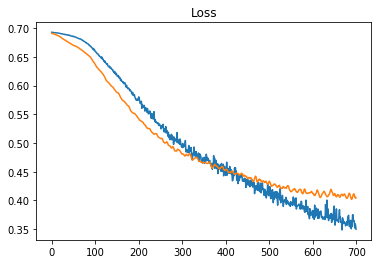

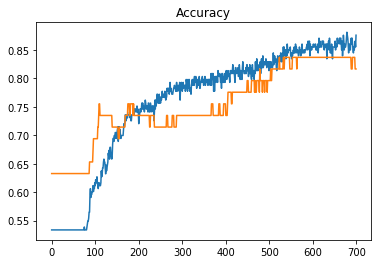

In [94]:
# Plot loss
plt.title("Loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

# Plot accuracy
plt.title("Accuracy")
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.show()

In [95]:
model.evaluate(test_data, test_labels)

61/61 [==============================] - 0s 116us/step


[0.3797447280805619, 0.8688524453366389]